<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.267857,91.708319,49.825800,-327.891342,-156.089367,66.433578,-222.522945
1,0.0,1.0,35.900640,43.427421,54.710062,345.833587,489.871711,81.142214,408.729497
2,0.0,2.0,55.376939,59.816490,31.991567,-294.917190,-137.732194,179.351443,-317.083637
3,0.0,3.0,52.921902,56.429237,38.395764,-82.730618,75.016285,168.195192,-93.178907
4,0.0,4.0,32.641142,28.668851,23.377334,136.154287,230.841615,18.253720,212.587895
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.032208,56.856219,87.499486,-683.307469,-475.919556,145.826779,-621.746335
59996,999.0,56.0,94.726853,46.436488,66.271208,-76.356432,141.078118,81.660636,59.417481
59997,999.0,57.0,95.056273,93.885954,29.906495,-668.186310,-439.337589,58.119902,-497.457492
59998,999.0,58.0,88.311140,66.532061,34.101016,-253.210850,-54.266633,94.371731,-148.638365


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    20.267857  91.708319  49.825800 -327.891342 -156.089367   
      1.0    35.900640  43.427421  54.710062  345.833587  489.871711   
      2.0    55.376939  59.816490  31.991567 -294.917190 -137.732194   
      3.0    52.921902  56.429237  38.395764  -82.730618   75.016285   
      4.0    32.641142  28.668851  23.377334  136.154287  230.841615   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.032208  56.856219  87.499486 -683.307469 -475.919556   
      56.0   94.726853  46.436488  66.271208  -76.356432  141.078118   
      57.0   95.056273  93.885954  29.906495 -668.186310 -439.337589   
      58.0   88.311140  66.532061  34.101016 -253.210850  -54.266633   
      59.0   60.864494  26.313309  47.957965   93.899975  239.035743   

                  y_hat       e_hat  
rep   index                          
0.0   0.0     66.433578 -222.522945  
      1.0     81.142214  408.729497  
      2.0    179.351443 -317.083637  
      3.0    168.195192  -93.178907  
      4.0     18.253720  212.587895  
...                 ...         ...  
999.0 55.0   145.826779 -621.746335  
      56.0    81.660636   59.417481  
      57.0    58.119902 -497.457492  
      58.0    94.371731 -148.638365  
      59.0   179.298367   59.737376  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    20.267857  91.708319  49.825800 -327.891342 -156.089367   
      1.0    35.900640  43.427421  54.710062  345.833587  489.871711   
      2.0    55.376939  59.816490  31.991567 -294.917190 -137.732194   
      3.0    52.921902  56.429237  38.395764  -82.730618   75.016285   
      4.0    32.641142  28.668851  23.377334  136.154287  230.841615   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.032208  56.856219  87.499486 -683.307469 -475.919556   
      56.0   94.726853  46.436488  66.271208  -76.356432  141.078118   
      57.0   95.056273  93.885954  29.906495 -668.186310 -439.337589   
      58.0   88.311140  66.532061  34.101016 -253.210850  -54.266633   
      59.0   60.864494  26.313309  47.957965   93.899975  239.035743   

                  y_hat       e_hat  
rep   index                          
0.0   0.0     66.433578 -222.522945  
      1.0     81.142214  408.729497  
      2.0    179.351443 -317.083637  
      3.0    168.195192  -93.178907  
      4.0     18.253720  212.587895  
...                 ...         ...  
999.0 55.0   145.826779 -621.746335  
      56.0    81.660636   59.417481  
      57.0    58.119902 -497.457492  
      58.0    94.371731 -148.638365  
      59.0   179.298367   59.737376  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.267857,91.708319,49.825800,-327.891342,-156.089367,66.433578,-222.522945
1,0.0,1.0,35.900640,43.427421,54.710062,345.833587,489.871711,81.142214,408.729497
2,0.0,2.0,55.376939,59.816490,31.991567,-294.917190,-137.732194,179.351443,-317.083637
3,0.0,3.0,52.921902,56.429237,38.395764,-82.730618,75.016285,168.195192,-93.178907
4,0.0,4.0,32.641142,28.668851,23.377334,136.154287,230.841615,18.253720,212.587895
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.032208,56.856219,87.499486,-683.307469,-475.919556,145.826779,-621.746335
59996,999.0,56.0,94.726853,46.436488,66.271208,-76.356432,141.078118,81.660636,59.417481
59997,999.0,57.0,95.056273,93.885954,29.906495,-668.186310,-439.337589,58.119902,-497.457492
59998,999.0,58.0,88.311140,66.532061,34.101016,-253.210850,-54.266633,94.371731,-148.638365


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    20.267857  91.708319  49.825800 -327.891342 -156.089367   
      1.0    35.900640  43.427421  54.710062  345.833587  489.871711   
      2.0    55.376939  59.816490  31.991567 -294.917190 -137.732194   
      3.0    52.921902  56.429237  38.395764  -82.730618   75.016285   
      4.0    32.641142  28.668851  23.377334  136.154287  230.841615   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.032208  56.856219  87.499486 -683.307469 -475.919556   
      56.0   94.726853  46.436488  66.271208  -76.356432  141.078118   
      57.0   95.056273  93.885954  29.906495 -668.186310 -439.337589   
      58.0   88.311140  66.532061  34.101016 -253.210850  -54.266633   
      59.0   60.864494  26.313309  47.957965   93.899975  239.035743   

                  y_hat       e_hat  
rep   index                          
0.0   0.0     66.433578 -222.522945  
      1.0     81.142214  408.729497  
      2.0    179.351443 -317.083637  
      3.0    168.195192  -93.178907  
      4.0     18.253720  212.587895  
...                 ...         ...  
999.0 55.0   145.826779 -621.746335  
      56.0    81.660636   59.417481  
      57.0    58.119902 -497.457492  
      58.0    94.371731 -148.638365  
      59.0   179.298367   59.737376  

[60000 rows x 7 columns]

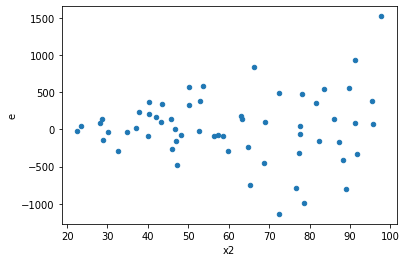

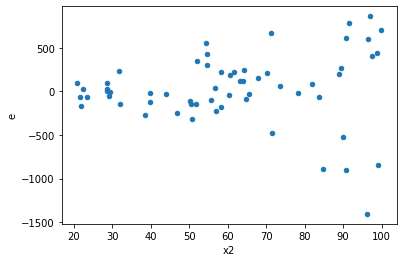

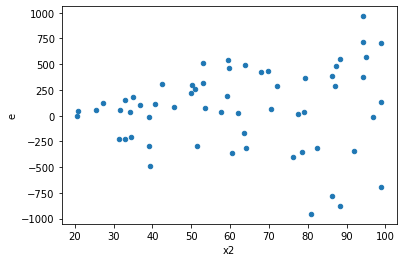

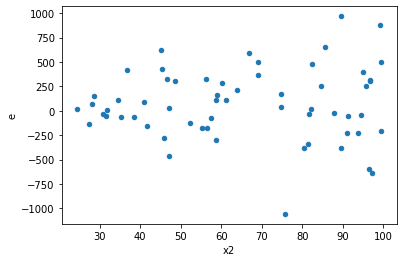

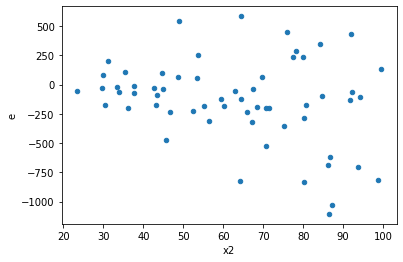

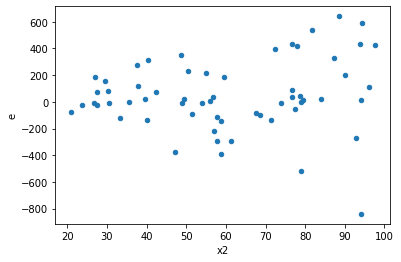

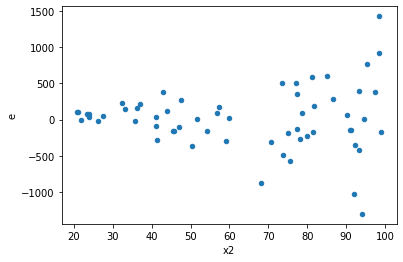

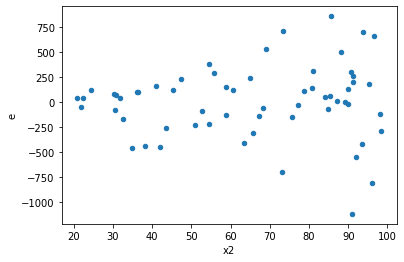

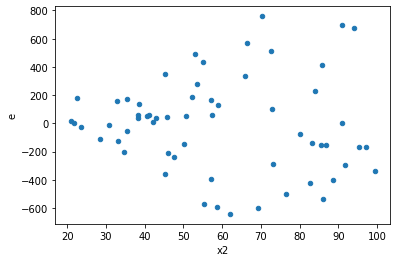

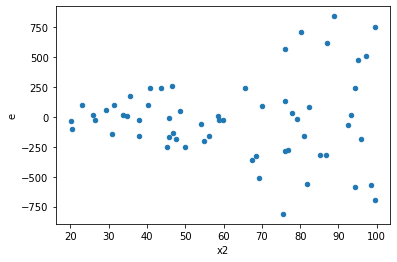

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,26.0,28.0,1975074.0139044253,6295442.47952475,75964.3851501702,224837.23141159822,2.959771621492476,0.0059659210409785945,0.9970170394795107,0.0029829605204892973,Reject001=0 : Heteroscedasticity
6.0,22.0,32.0,1831391.0794154594,7976428.575905237,83245.04906433907,249263.39299703867,2.994332945907523,0.004740080761234777,0.9976299596193826,0.0023700403806173886,Reject001=0 : Heteroscedasticity
7.0,19.0,35.0,1403202.773278466,5704887.37358036,73852.77754097189,162996.78210229598,2.2070501276931522,0.04148518552828584,0.9792574072358571,0.02074259276414292,Reject001=1 : Homoscedasticity
8.0,24.0,30.0,2273861.659653387,3103094.463670157,94744.23581889113,103436.48212233857,1.0917443285949675,0.810881891902117,0.5945590540489415,0.4054409459510585,Reject001=1 : Homoscedasticity
9.0,25.0,29.0,2905275.096038862,3399827.5327022346,116211.00384155448,117235.43216214603,1.0088152437095224,0.9743822775139335,0.5128088612430333,0.48719113875696674,Reject001=1 : Homoscedasticity
10.0,19.0,35.0,1358648.0277296586,6198061.644372123,71507.79093313993,177087.47555348923,2.4764780626360943,0.019620596786417366,0.9901897016067913,0.009810298393208683,Reject001=1 : Homoscedasticity
11.0,27.0,27.0,1877672.283829215,3252144.1337343967,69543.41791960056,120449.78273090358,1.7320083817300451,0.15994146666825837,0.9200292666658708,0.07997073333412918,Reject001=1 : Homoscedasticity
12.0,19.0,35.0,1275226.5446530615,4274608.57802187,67117.18656068745,122131.67365776771,1.8196780871816802,0.12234039075711656,0.9388298046214417,0.06117019537855828,Reject001=1 : Homoscedasticity
14.0,24.0,30.0,668838.0291180608,6078611.810841363,27868.251213252533,202620.3936947121,7.2706533375283176,9.576747754813653e-07,0.9999995211626123,4.788373877406826e-07,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,23.0,8591000.330370743,2297324.506224185,277129.0429151853,99883.67418366023,0.36042297527881045,0.008611853538988752,Reject001=0 : Heteroscedasticity
1.0,26.0,28.0,1975074.0139044253,6295442.47952475,75964.3851501702,224837.23141159822,2.959771621492476,0.0059659210409785945,Reject001=0 : Heteroscedasticity
2.0,28.0,26.0,5339873.006576189,2792231.2520419857,190709.7502348639,107393.50969392253,0.5631254278381923,0.13962004173720138,Reject001=1 : Homoscedasticity
3.0,27.0,27.0,4016052.469140307,2800220.615647722,148742.6840422336,103711.87465361934,0.6972569798738583,0.3545686854214025,Reject001=1 : Homoscedasticity
4.0,31.0,23.0,5539553.822665369,1106393.1142835466,178695.28460210867,48104.04844711072,0.269195958663495,0.000803185369404158,Reject001=0 : Heteroscedasticity
5.0,15.0,39.0,2009943.457588348,1940644.8866696658,133996.23050588986,49760.1252992222,0.37135466506302184,0.0417855315697506,Reject001=1 : Homoscedasticity
6.0,22.0,32.0,1831391.0794154594,7976428.575905237,83245.04906433907,249263.39299703867,2.994332945907523,0.004740080761234777,Reject001=0 : Heteroscedasticity
7.0,19.0,35.0,1403202.773278466,5704887.37358036,73852.77754097189,162996.78210229598,2.2070501276931522,0.04148518552828584,Reject001=1 : Homoscedasticity
8.0,24.0,30.0,2273861.659653387,3103094.463670157,94744.23581889113,103436.48212233857,1.0917443285949675,0.810881891902117,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      617
Reject001=0 : Heteroscedasticity    383
Name: Result_test, dtype: int64